<a href="https://www.kaggle.com/code/klyushnik/smoker-death?scriptVersionId=168376701" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import datetime as dt

from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier

from scipy.optimize import minimize
import random
from copy import deepcopy
from functools import partial
from itertools import combinations
from sklearn.preprocessing import StandardScaler


import optuna
from optuna.samplers import TPESampler
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFECV
from mlxtend.classifier import StackingCVClassifier
from sklearn.calibration import CalibratedClassifierCV

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


# AutoViz

In [2]:
!pip install AutoViz
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 10.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8

In [3]:
from autoviz.AutoViz_Class import AutoViz_Class

#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
start_time = dt.datetime.now()
print("Started at ", start_time)

Started at  2024-03-23 05:32:24.419848


In [5]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import datetime as dt

    max_rows_analyzed is smaller than dataset shape 159256...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 24)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  14
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    24 Predictors classified...
        1 variable(s) removed since they were ID or low-info

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,0.000000,159255.000000,Possible ID column: drop before modeling step.
age,int64,0.000000,0,20.000000,85.000000,Column has 630 outliers greater than upper bound (77.50) or lower than lower bound(17.50). Cap them or remove them.
height(cm),int64,0.000000,0,135.000000,190.000000,Column has 429 outliers greater than upper bound (185.00) or lower than lower bound(145.00). Cap them or remove them.
weight(kg),int64,0.000000,0,30.000000,130.000000,"Column has 2159 outliers greater than upper bound (97.50) or lower than lower bound(37.50). Cap them or remove them., Column has a high correlation with ['waist(cm)']. Consider dropping one of them."
waist(cm),float64,0.000000,NA,51.000000,127.000000,Column has 812 outliers greater than upper bound (107.00) or lower than lower bound(59.00). Cap them or remove them.
eyesight(left),float64,0.000000,NA,0.100000,9.900000,Column has 2196 outliers greater than upper bound (1.80) or lower than lower bound(0.20). Cap them or remove them.
eyesight(right),float64,0.000000,NA,0.100000,9.900000,Column has 2363 outliers greater than upper bound (1.80) or lower than lower bound(0.20). Cap them or remove them.
hearing(left),int64,0.000000,0,1.000000,2.000000,No issue
hearing(right),int64,0.000000,0,1.000000,2.000000,No issue
systolic,int64,0.000000,0,77.000000,213.000000,Column has 1496 outliers greater than upper bound (154.00) or lower than lower bound(90.00). Cap them or remove them.


Number of All Scatter Plots = 15


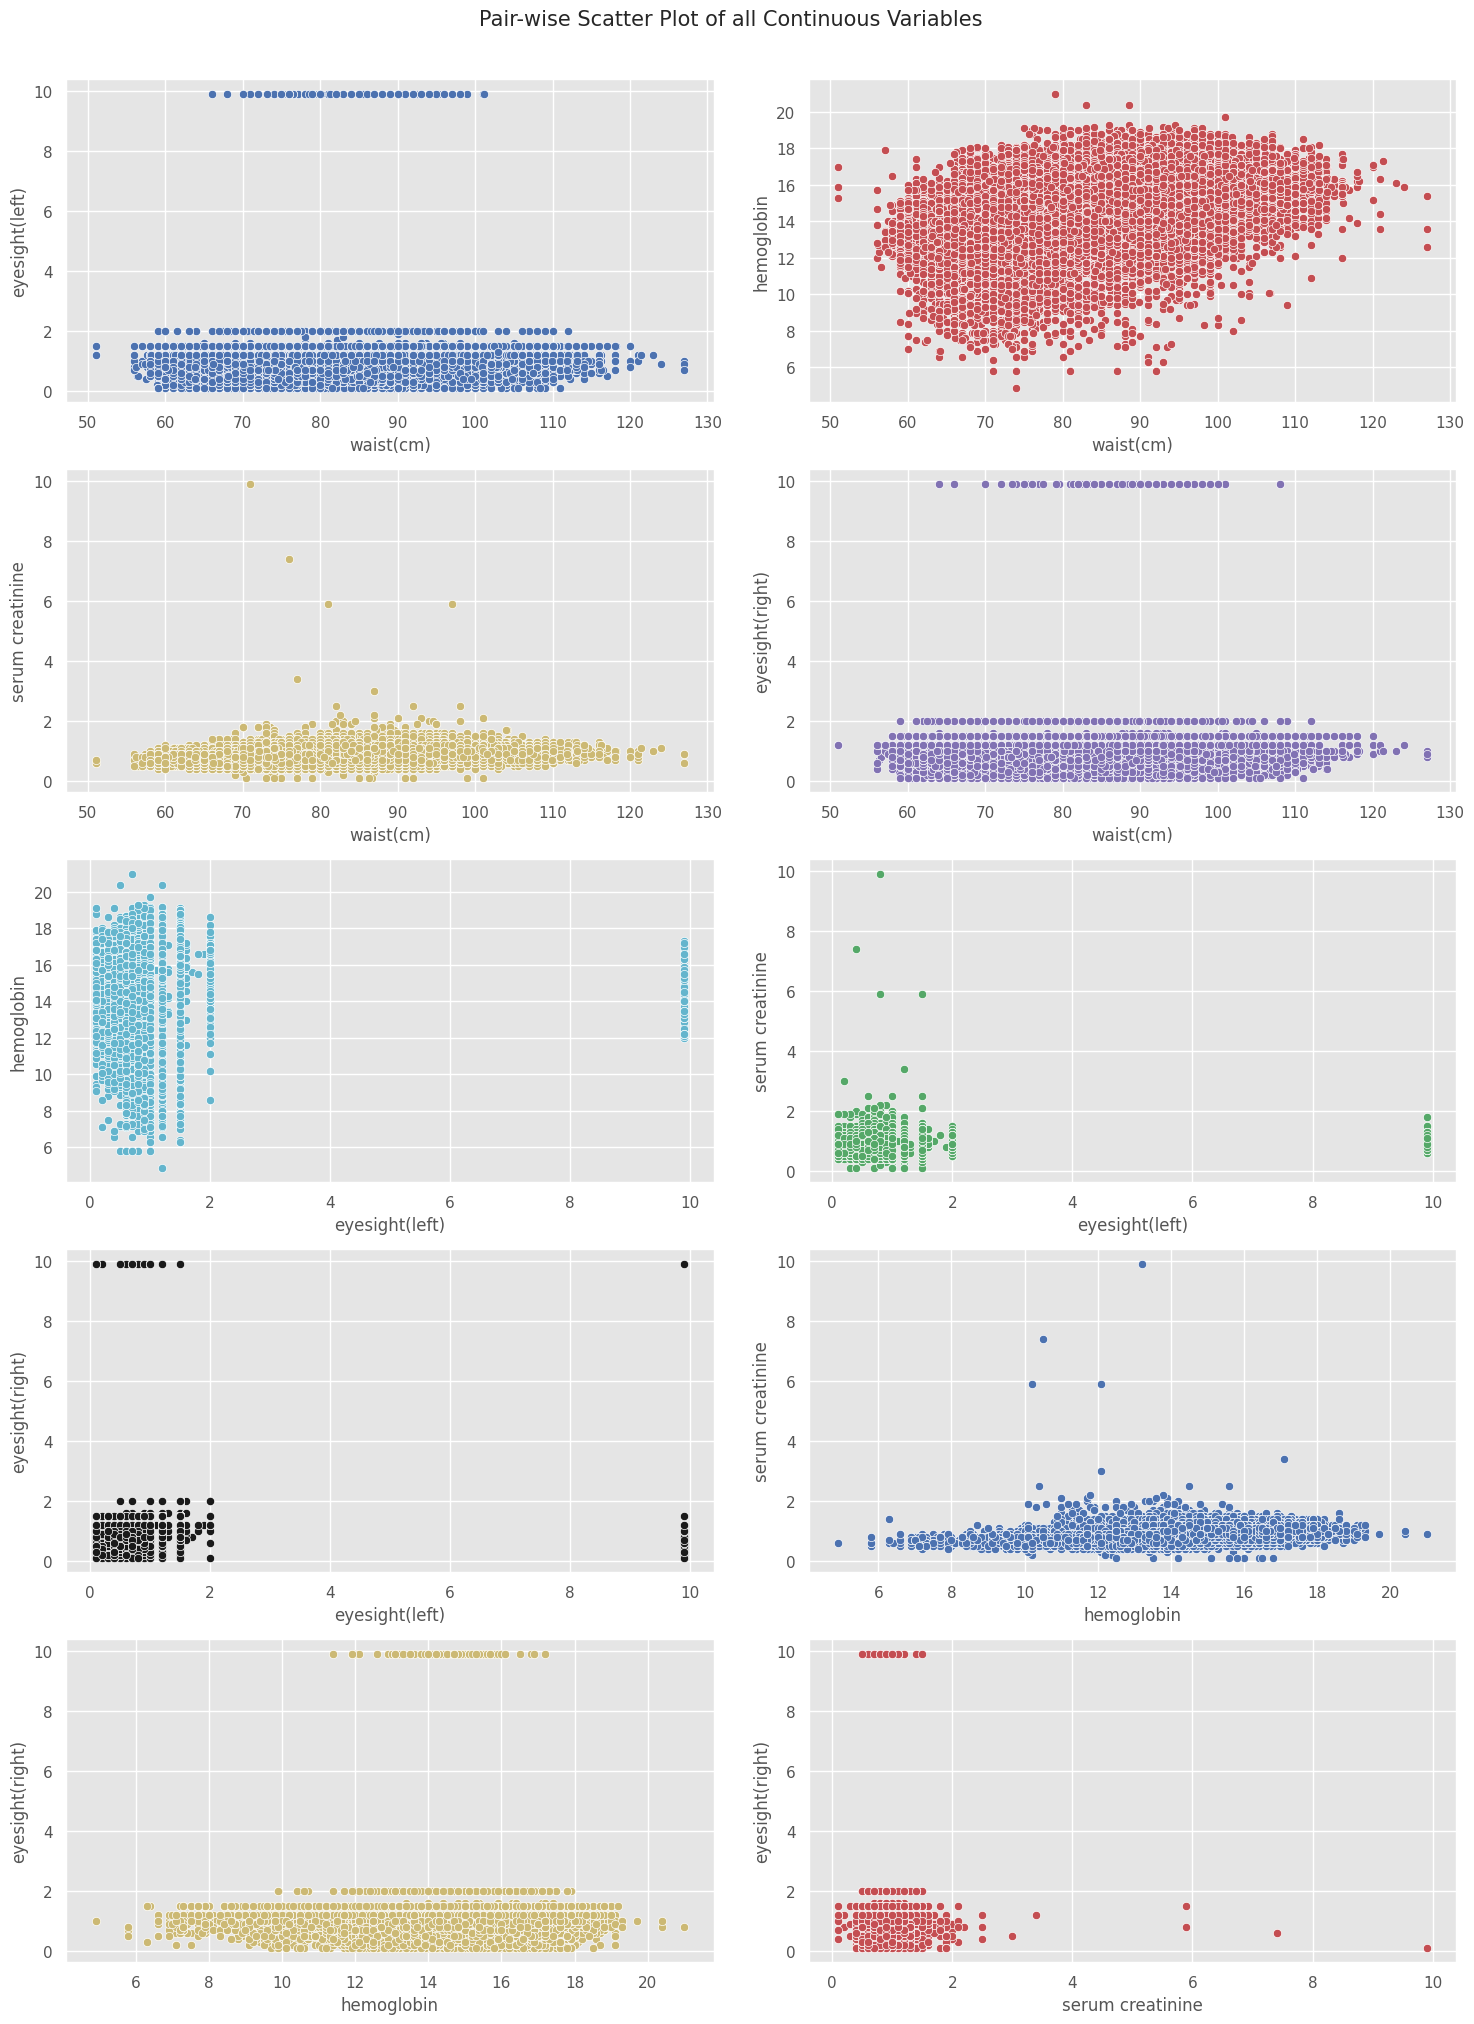

Could not draw Distribution Plot


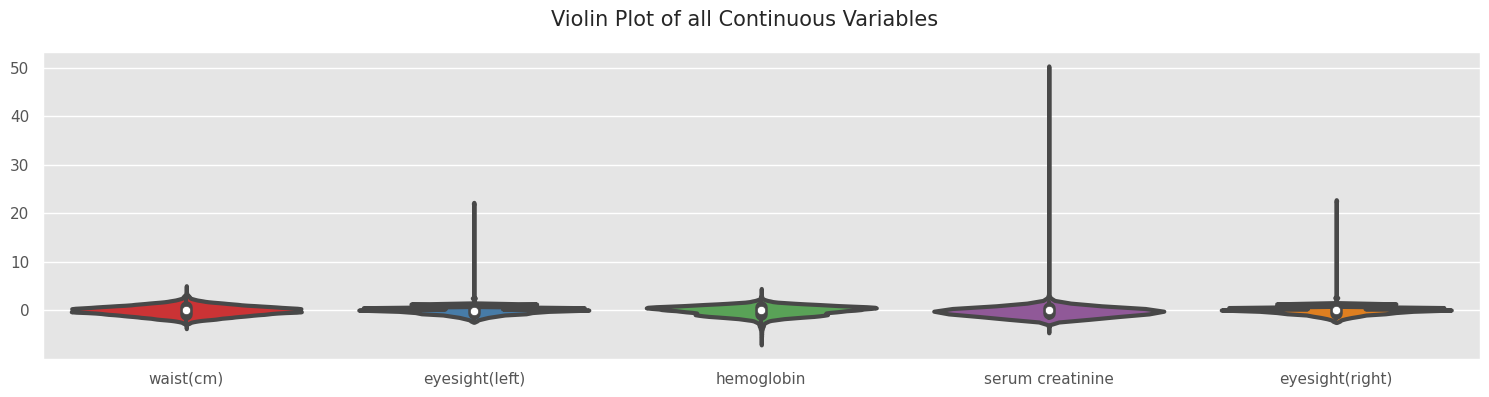

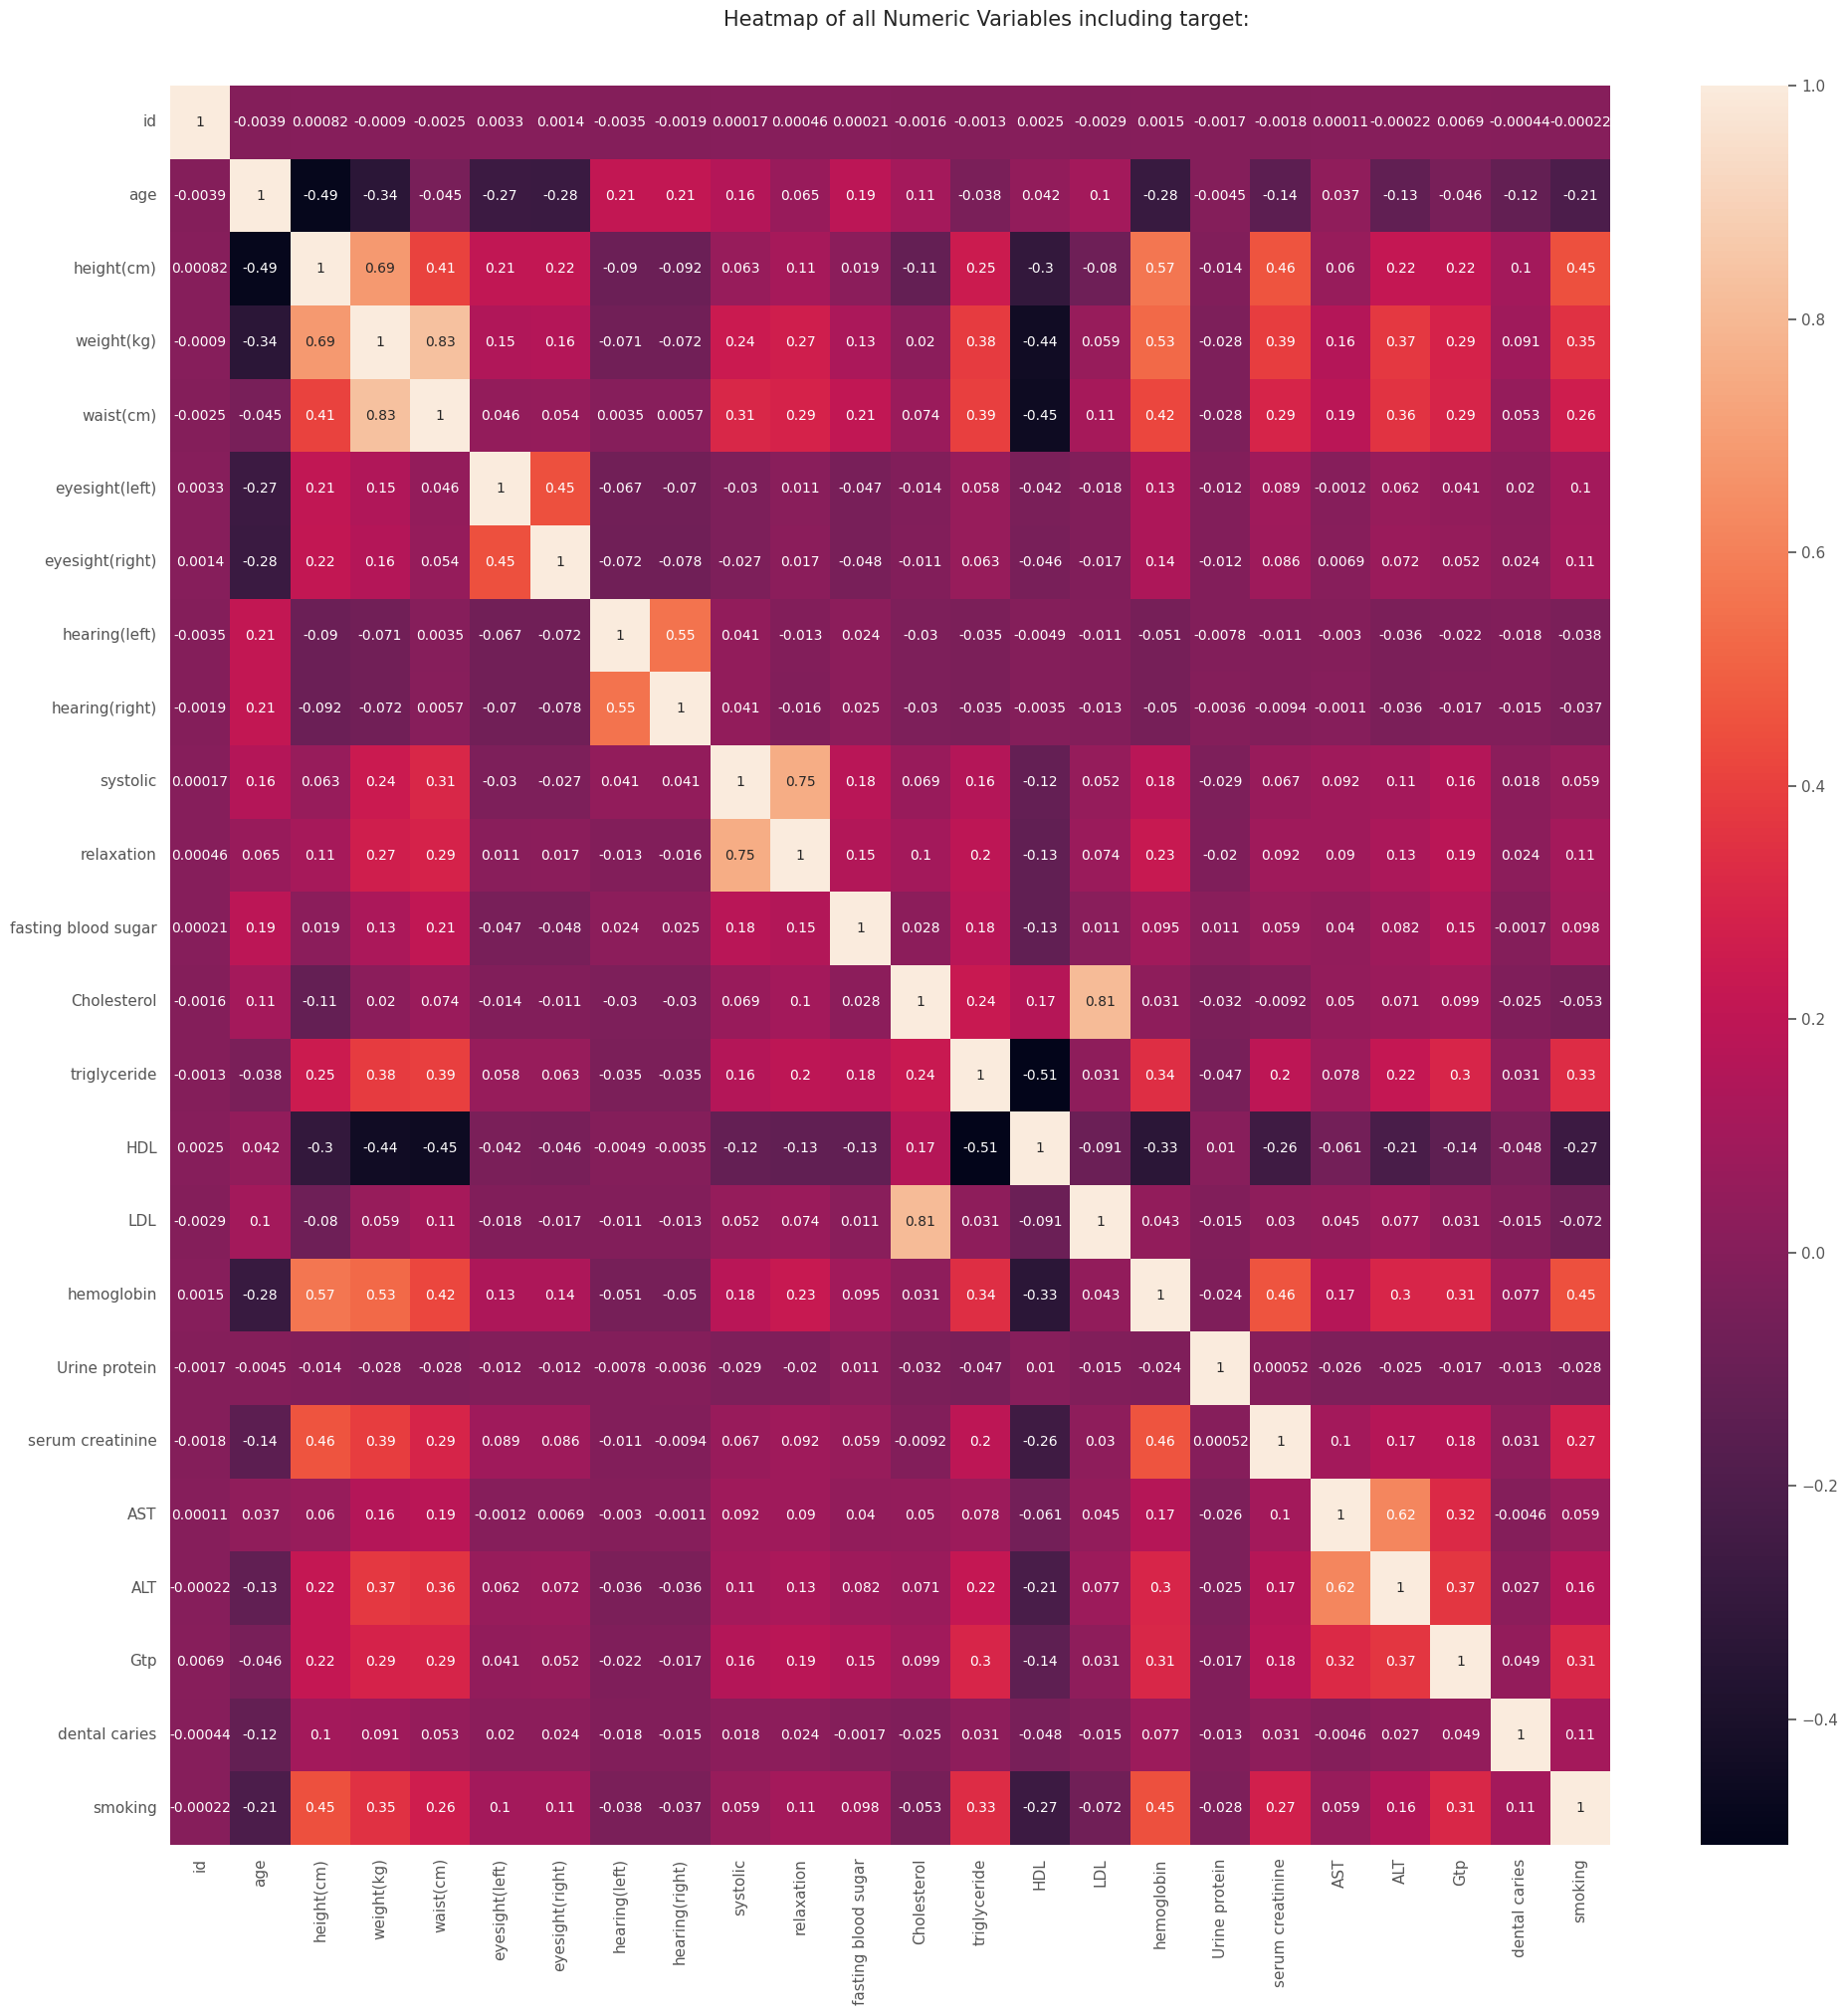

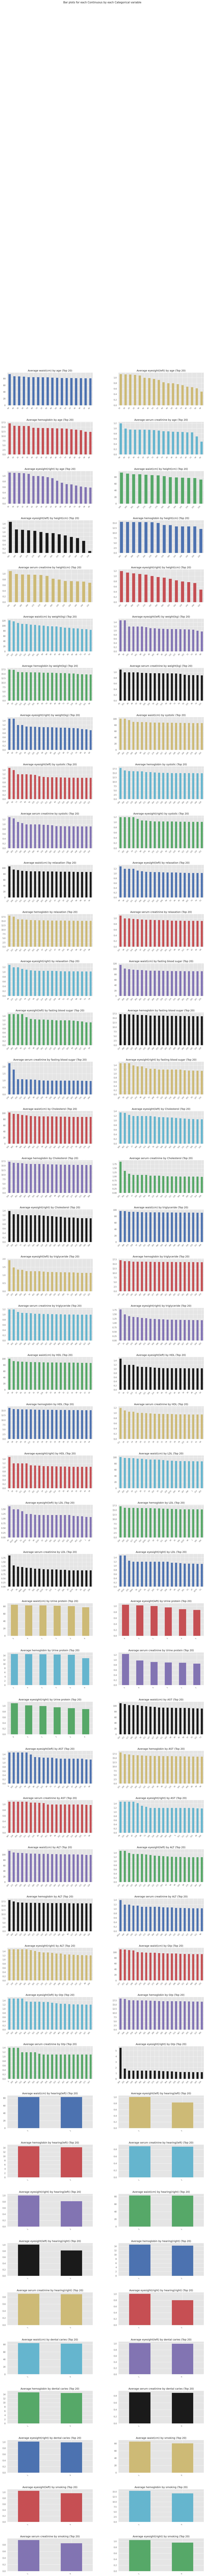

All Plots done
Time to run AutoViz = 55 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [6]:
dftc = AV.AutoViz('/kaggle/input/playground-series-s3e24/train.csv')

# Load data

In [7]:
train = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

print('train shape = ', train.shape, 'test shape = ', test.shape)

train shape =  (159256, 24) test shape =  (106171, 23)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [9]:
train['bmi'] = train['weight(kg)']/(train['height(cm)']*100) **2
test['bmi'] = test['weight(kg)']/(test['height(cm)']*100) **2

<Axes: >

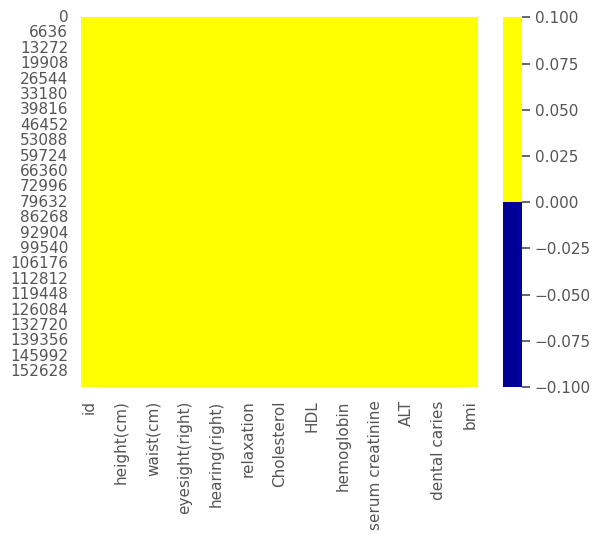

In [10]:
cols = train.columns 

colours = ['#000099', '#ffff00'] 
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

In [11]:
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
age - 0%
height(cm) - 0%
weight(kg) - 0%
waist(cm) - 0%
eyesight(left) - 0%
eyesight(right) - 0%
hearing(left) - 0%
hearing(right) - 0%
systolic - 0%
relaxation - 0%
fasting blood sugar - 0%
Cholesterol - 0%
triglyceride - 0%
HDL - 0%
LDL - 0%
hemoglobin - 0%
Urine protein - 0%
serum creatinine - 0%
AST - 0%
ALT - 0%
Gtp - 0%
dental caries - 0%
smoking - 0%
bmi - 0%


In [12]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,1.592560e+05
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365,2.445283e-07
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063,3.368651e-08
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000,1.171875e-07
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000,2.222222e-07
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000,2.422145e-07
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000,2.615933e-07
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000,4.578564e-07


In [13]:
num_rows = len(train.index)
low_information_cols = [] #

for col in train.columns:
    cnts = train[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

hearing(left): 97.60260%
hearing(left)
1    155438
2      3818
Name: count, dtype: int64

hearing(right): 97.65786%
hearing(right)
1    155526
2      3730
Name: count, dtype: int64



In [14]:
train = train.drop(columns = ['id','hearing(left)','hearing(right)'], axis =1)
test = test.drop(columns = ['id','hearing(left)','hearing(right)'], axis =1)

print('train shape = ', train.shape, 'test shape = ', test.shape)

train shape =  (159256, 22) test shape =  (106171, 21)


In [15]:
df_dedupped = train.drop_duplicates()

print(train.shape)
print(df_dedupped.shape)

(159256, 22)
(159256, 22)


# Baseline

In [16]:
X = train.drop(columns = ['smoking'],axis =1)
y = train.smoking
X_total = test

In [17]:
class AggFeatureExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_col, agg_col, agg_func):
        self.group_col = group_col
        self.group_col_name = ''
        for col in group_col:
            self.group_col_name += col
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.agg_df = None
        self.medians = None
        
    def fit(self, X, y=None):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        
        self.agg_df = X.groupby(group_col)[agg_col].agg(agg_func)
        self.agg_df.columns = [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]
        self.medians = X[agg_col].median()
        
        return self
    
    def transform(self, X):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        agg_df = self.agg_df
        medians = self.medians
        
        X_merged = pd.merge(X, agg_df, left_on=group_col, right_index=True, how='left')
        X_merged.fillna(medians, inplace=True)
        X_agg = X_merged.loc[:, [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]]
        
        return X_agg
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_agg = self.transform(X)
        return X_agg

In [18]:
class Preprocessor:
    def __init__(self, agg_col, agg_func, group_cols):
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.group_cols = group_cols
        
    def preprocess(self, X, X_total):        
        agg_train, agg_test = [], []
        for group_col in self.group_cols:
            agg_extractor = AggFeatureExtractor(group_col=group_col, agg_col=self.agg_col, agg_func=self.agg_func)
            agg_extractor.fit(pd.concat([X, X_total], axis=0))
            agg_train.append(agg_extractor.transform(X))
            agg_test.append(agg_extractor.transform(X_total))
        X = pd.concat([X] + agg_train, axis=1)
        X_total = pd.concat([X_total] + agg_test, axis=1)
        
        X = X.fillna(0)
        X_total = X_total.fillna(0)
                
        return X, X_total

In [19]:
agg_col = X.columns

agg_func = ['mean', 'std']
group_cols = [['height(cm)'],[ 'triglyceride'], ['LDL'],
              ['height(cm)', 'triglyceride'],['triglyceride', 'LDL'], ['hemoglobin', 'Gtp'],
              ['height(cm)', 'triglyceride', 'LDL']]

pp = Preprocessor(agg_col, agg_func, group_cols)
X, X_total = pp.preprocess(X, X_total)

print(f"X_train shape :{X.shape} , y_train shape :{y.shape}")
print(f"X_test shape :{X_total.shape}")

X_train shape :(159256, 315) , y_train shape :(159256,)
X_test shape :(106171, 315)


In [20]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]

In [21]:
X = variance_threshold(X,0.4)
list_name = (X.columns)
X_total = X_total[list_name]

print('Shape train =', X.shape)

Shape train = (159256, 198)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [23]:
clf = CatBoostClassifier(iterations = 200, verbose = 0)
selector = RFECV(estimator = clf, cv = 2, min_features_to_select=100, step=1, scoring = 'roc_auc')
selector.fit(X_train, y_train)

RFECV(cv=2,
      estimator=<catboost.core.CatBoostClassifier object at 0x7df20b7f6b60>,
      min_features_to_select=100, scoring='roc_auc')

In [24]:
list_name = X_train.columns[selector.support_]
print('Best features :', X_train.columns[selector.support_])

Best features : Index(['age', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'HDL', 'LDL', 'hemoglobin',
       ...
       'height(cm)triglycerideLDL_std_fasting blood sugar',
       'height(cm)triglycerideLDL_mean_Cholesterol',
       'height(cm)triglycerideLDL_mean_triglyceride',
       'height(cm)triglycerideLDL_mean_HDL',
       'height(cm)triglycerideLDL_std_HDL',
       'height(cm)triglycerideLDL_mean_hemoglobin',
       'height(cm)triglycerideLDL_mean_AST',
       'height(cm)triglycerideLDL_std_ALT',
       'height(cm)triglycerideLDL_mean_Gtp',
       'height(cm)triglycerideLDL_std_Gtp'],
      dtype='object', length=137)


In [25]:
X = X[list_name]

X_total = X_total[list_name]

print('Shape train =', X.shape)
print('Shape test =', X_total.shape)

Shape train = (159256, 137)
Shape test = (106171, 137)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [27]:
clf = CatBoostClassifier(verbose = 0)

clf1 = xgb.XGBClassifier()

clf2 = lgb.LGBMClassifier()

clf3 = HistGradientBoostingClassifier()

print('Score baseline CatBoostClassifier',
      cross_val_score(clf,X_train,y_train,cv=5,scoring='roc_auc').mean())

print('Score baseline XGBClassifier',
      cross_val_score(clf1,X_train,y_train,cv=5,scoring='roc_auc').mean())

print('Score baseline LGBMClassifier',
      cross_val_score(clf2,X_train,y_train,cv=5,scoring='roc_auc').mean())

print('Score baseline HistGradientBoostingClassifier',
      cross_val_score(clf3,X_train,y_train,cv=5,scoring='roc_auc').mean())

Score baseline CatBoostClassifier 0.861230916155504
Score baseline XGBClassifier 0.8540404143014477
Score baseline LGBMClassifier 0.8604548844626189
Score baseline HistGradientBoostingClassifier 0.8598996613346876


# Train and predict

In [28]:
FOLDS=5
seed = 42
np.random.seed(seed)

In [29]:
cat_param = {
                'iterations': 940,
                'learning_rate': 0.09998843555226006,
                'depth': 6,
                'l2_leaf_reg': 1.307190263819356,
                'bootstrap_type': 'Bayesian',
                'random_strength': 1.6244863691278892e-05,
                'bagging_temperature': 0.004826851963673568,
                'od_type': 'Iter',
                'od_wait': 23
}

xgb_param = {
             'max_depth': 9,
             'learning_rate': 0.14260267265151924,
             'n_estimators': 500,
             'min_child_weight': 10,
             'gamma': 2.569045308737364e-08,
             'subsample': 0.7904305981013752,
             'colsample_bytree': 0.14430966113935584,
             'reg_alpha': 2.934397831436567e-07,
             'reg_lambda': 7.003632756570852e-05
}

lgb_param={
           'lambda_l1': 4.29515692803417, 
           'lambda_l2': 5.60968951956001e-08,
           'num_leaves': 131, 
           'feature_fraction': 0.587099638354062,
           'bagging_fraction': 0.9997011002618912,
           'bagging_freq': 2,
           'min_child_samples': 38
}

hbr_param = {
             'l2_regularization': 6.8696420762499445e-09,
             'early_stopping': 'auto',
             'learning_rate': 0.08321345684368107,
             'max_iter': 1000, 
             'max_depth': 14,
             'max_bins': 253,
             'min_samples_leaf': 1336, 
             'max_leaf_nodes': 21
}

xgb_optuna  = {
            'n_estimators': 1500,
            'learning_rate': 0.08901459197907591,
            'booster': 'gbtree',
            'lambda': 8.550251116462702,
            'alpha': 6.92130114930949,
            'eta': 0.7719873740829137,
            'grow_policy': 'lossguide',
            'n_jobs': -1,
            'objective': 'binary:logistic',
            'verbosity': 0,
            'random_state': seed
        }

lgb_optuna = {
            'learning_rate': 0.012019976156417951,
            'max_depth': 4,
            'lambda': 6.958643473661789,
            'alpha': 0.0012598800466591953, 
            'subsample': 0.9344619448867001,
            'colsample_bytree': 0.9864399750557648, 
            'min_child_weight': 1,
            'random_state': seed
        }

cat_optuna = {
            'iterations': 600,
            'learning_rate': 0.019499308200732167,
            'depth': 8,
            'l2_leaf_reg': 9.024309909697191,
            'bagging_temperature': 7.9669359481998825,
            'random_strength': 5.293875378529096,
            'border_count': 235,
            'auto_class_weights': 'Balanced',
            'allow_writing_files': False,
            'random_state': seed
        }

In [30]:
classifier1 = CatBoostClassifier(**cat_param,verbose = 0)
classifier2 = xgb.XGBClassifier(**xgb_param)
classifier3 = lgb.LGBMClassifier(**lgb_param)
classifier4 = lgb.LGBMClassifier(**lgb_optuna)
classifier5 = CalibratedClassifierCV(classifier1, cv=StratifiedKFold(n_splits=FOLDS))
classifier6 = CalibratedClassifierCV(classifier3, cv=StratifiedKFold(n_splits=FOLDS))
classifier7 = HistGradientBoostingClassifier(**hbr_param)
classifier8 = CatBoostClassifier(**cat_optuna,verbose = 0)
classifier9 = xgb.XGBClassifier(**xgb_optuna)


sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4, 
                                           classifier5, classifier6, classifier7,classifier8,classifier9],
                            shuffle = False,
                            use_probas = True,
                            cv = StratifiedKFold(n_splits=FOLDS),
                            meta_classifier = CatBoostClassifier(verbose = 0))

In [31]:
classifiers = {"cat": classifier1,
               "xgb": classifier2,
               "lgb": classifier3,
               'lgb2' : classifier4,
               'calib':classifier5,
               'calib2':classifier6,
               'hist':classifier7,
               'cat2':classifier8,
               "xgb2":classifier9,
               "Stack": sclf}

In [32]:
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

[LightGBM] [Warning] lambda_l1 is set=4.29515692803417, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.29515692803417
[LightGBM] [Warning] feature_fraction is set=0.587099638354062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.587099638354062
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.60968951956001e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.60968951956001e-08
[LightGBM] [Warning] bagging_fraction is set=0.9997011002618912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9997011002618912
[LightGBM] [Warning] lambda_l1 is set=4.29515692803417, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.29515692803417
[LightGBM] [Warning] feature_fraction is set=0.587099638354062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.587099638354062
[LightGBM] [Warning] bagging_freq is set=2, s

In [33]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results['Target'] = y_test.index.duplicated()

In [34]:
results

,cat,xgb,lgb,lgb2,calib,calib2,hist,cat2,xgb2,Stack,Target
0,0.051439,0.010911,0.041618,0.167681,0.072431,0.069614,0.060958,0.081349,0.019573,0.046064,False
1,0.833779,0.762500,0.856092,0.652641,0.856958,0.869337,0.853898,0.882087,0.862417,0.841454,False
2,0.700662,0.704632,0.617394,0.607970,0.619541,0.616065,0.615112,0.624076,0.624418,0.670781,False
3,0.574597,0.620580,0.583153,0.615913,0.542626,0.583618,0.519103,0.630061,0.693084,0.597844,False
4,0.888984,0.965506,0.890316,0.680305,0.892207,0.884227,0.907484,0.905351,0.937888,0.887731,False
...,...,...,...,...,...,...,...,...,...,...,...
47772,0.902508,0.951926,0.807292,0.550638,0.838719,0.832540,0.848190,0.823554,0.894935,0.867716,False
47773,0.022434,0.007031,0.019745,0.156803,0.065556,0.062257,0.024795,0.035474,0.020093,0.019701,False
47774,0.911605,0.910828,0.860346,0.673910,0.877744,0.861727,0.900073,0.858386,0.909365,0.896079,False
47775,0.506773,0.360427,0.469616,0.523294,0.370752,0.416241,0.457144,0.600954,0.454104,0.412400,False


In [35]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_total)[:,1]

In [36]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')
sub['smoking'] = y_pred
sub

,id,smoking
0,159256,0.673822
1,159257,0.247525
2,159258,0.232908
3,159259,0.010829
4,159260,0.558141
...,...,...
106166,265422,0.531586
106167,265423,0.729065
106168,265424,0.229940
106169,265425,0.167853


# Submit

In [37]:
sub.to_csv('submission.csv', index=False)